# House Prices advanced regression techniques

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
house_df_origin=pd.read_csv('./data/train.csv')

house_df=house_df_origin.copy()
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_df.shape

(1460, 81)

In [6]:
house_df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [7]:
house_df.isnull().sum()/len(house_df)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [8]:
isnull_series=house_df.isnull().sum()

isnull_series[isnull_series > 0 ].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

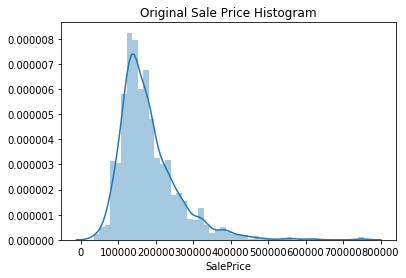

In [9]:
plt.title('Original Sale Price Histogram')
sns.distplot(house_df['SalePrice'])

타깃값의 분포가 치우쳐져 있음

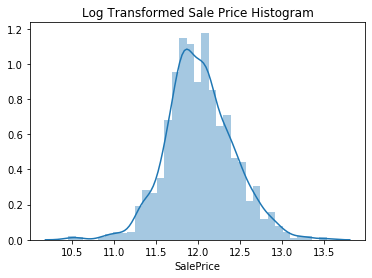

In [11]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice=np.log1p(house_df['SalePrice'])
sns.distplot(log_SalePrice)

In [12]:
# SalePrice 로그 변환

origin_SalePrice=house_df['SalePrice']
house_df['SalePrice']=np.log1p(house_df['SalePrice'])

house_df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)

In [13]:
house_df.fillna(house_df.mean(), inplace=True)

In [15]:
null_columns_count=house_df.isnull().sum()[house_df.isnull().sum() > 0] # null값이 존재하는 칼럼, cnt
null_columns_count

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [16]:
null_columns_count.index

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [18]:
house_df.dtypes[null_columns_count.index]

MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object

get_dummies() 는 자동으로 문자열 피처를 원-핫 인코딩 변환해주기 때문에, Null 값은 'None' 으로 대체해준다.

따라서, 별도의 Null 값을 대체하는 로직이 필요없다.

In [21]:
house_df_ohe=pd.get_dummies(house_df)

In [23]:
house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]

Series([], dtype: int64)

In [25]:
house_df_ohe.shape

(1460, 271)

In [26]:
def get_rmse(model):
    pred=model.predict(x_test)
    mse=mean_squared_error(y_test, pred)
    rmse=np.sqrt(mse)
    
    print(model.__class__.__name__,' 로그 변환된 RMSE : ',np.round(rmse, 3))
    return rmse

def get_rmses(models):
    rmses=[]
    for model in models:
        rmse=get_rmse(model)
        rmses.append(rmse)
        
    return rmses

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
y=house_df_ohe['SalePrice']
X=house_df_ohe.drop('SalePrice', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

In [31]:
lr_reg=LinearRegression()
lr_reg.fit(x_train, y_train)

ridge_reg=Ridge()
ridge_reg.fit(x_train, y_train)

lasso_reg=Lasso()
lasso_reg.fit(x_train, y_train)

models=[lr_reg, ridge_reg, lasso_reg]

get_rmses(models)

LinearRegression  로그 변환된 RMSE :  0.129
Ridge  로그 변환된 RMSE :  0.124
Lasso  로그 변환된 RMSE :  0.172


[0.12904191499497292, 0.12429663821697673, 0.17162071661564268]

Lasso가 유독 성능이 좋지 않음을 볼 수 있다.

In [32]:
def get_top_botton_coef(model, n=10):
    coef=pd.Series(model.coef_, index=X.columns)
    
    # 상위 10개
    coef_high=coef.sort_values(ascending=False).head(n)
    # 하위 10개
    coef_low=coef.sort_values(ascending=False).tail(n)
    
    return coef_high, coef_low

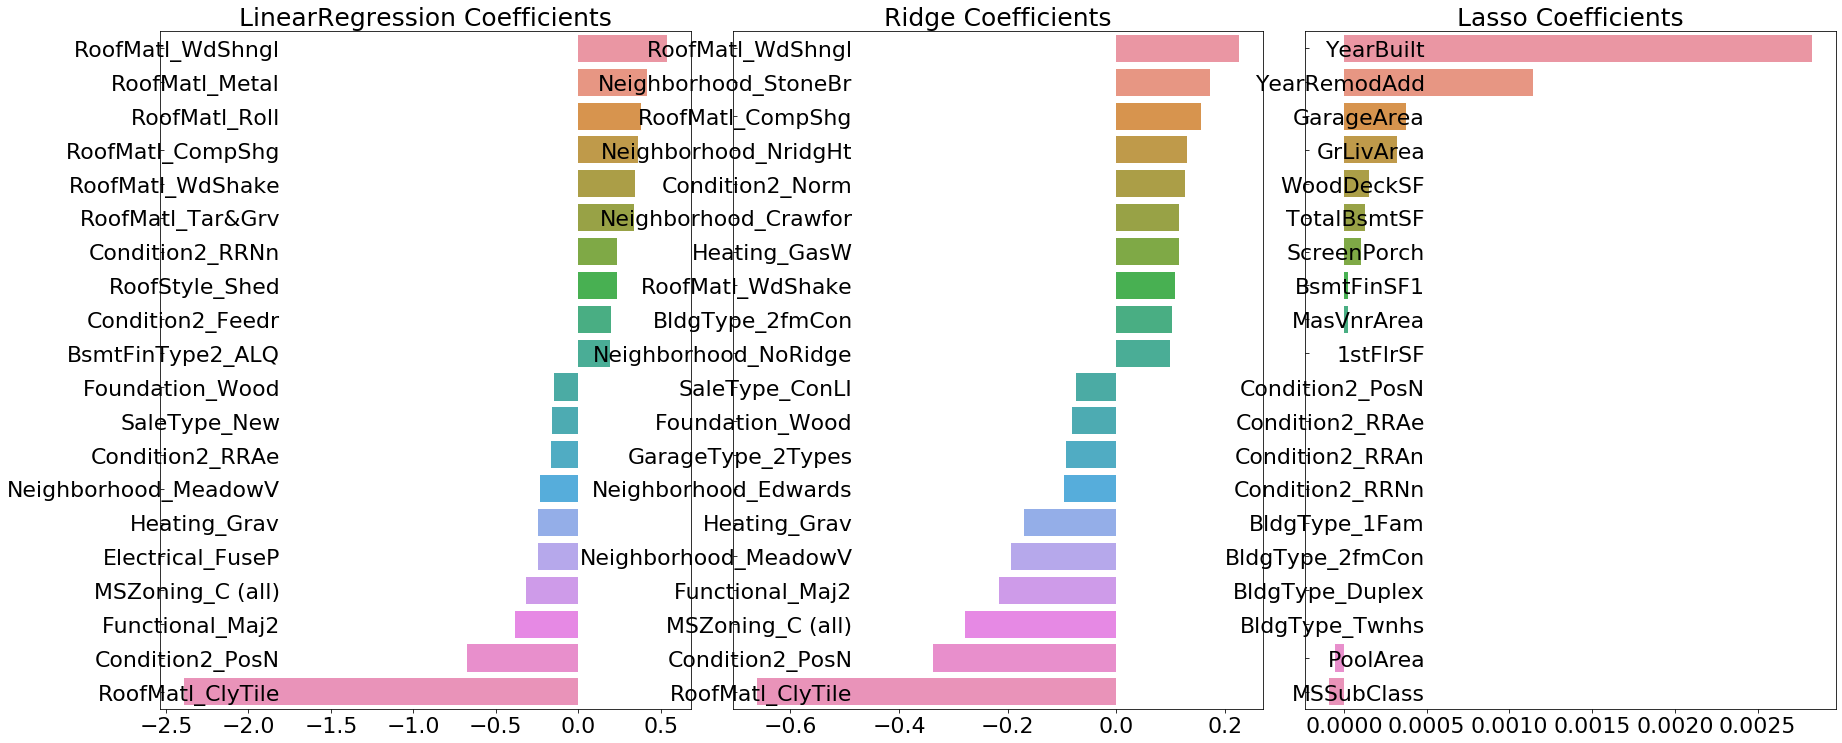

In [34]:
def visualize_coeffieint(models):
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    
    for i, model in enumerate(models):
        coef_high, coef_low = get_top_botton_coef(model)
        coef_concat=pd.concat([coef_high, coef_low])
        
        axs[i].set_title(model.__class__.__name__+' Coefficients', size=25)
        axs[i].tick_params(axis='y', direction='in', pad=-120)
        
        for label in (axs[i].get_xticklabels() + axs[i].get_yticklabels()):
            label.set_fontsize(22)
            
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i])
        
models=[lr_reg, ridge_reg, lasso_reg]
visualize_coeffieint(models)

LinearRegression 과 Ridge 알고리즘과는 달리, Lasso의 피쳐 importance가 유독 다르다.

train, test 셋을 분리하는 과정에서 생긴 오류인지 판별하기 위해 교차검증폴드 세트를 분할하여 평균 RMSE를 측정해본다.

In [36]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        rmse_list=np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
        rmse_avg=np.mean(rmse_list)
        
        print('\n{0} CV RMSE 값 리스트 : {1}'.format(model.__class__.__name__, np.round(rmse_list,3)))
        print('{0} CV 평균 RMSE 값 : {1}'.format(model.__class__.__name__, np.round(rmse_avg,3)))
        
models=[lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트 : [0.135 0.165 0.168 0.111 0.198]
LinearRegression CV 평균 RMSE 값 : 0.155

Ridge CV RMSE 값 리스트 : [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값 : 0.144

Lasso CV RMSE 값 리스트 : [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값 : 0.198


여전히 Lasso의 성능이 다른 알고리즘에 비해 떨어짐을 볼 수 있다.

In [40]:
from sklearn.model_selection import GridSearchCV

# 모델의 최적의 하이퍼 파라미터를 도출을 위한 메소드 생성
def print_best_params(model, params):
    grid_model=GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    
    grid_model.fit(X,y)
    rmse=np.sqrt(-1*grid_model.best_score_)
    
    print('{0} 5 CV시 최적 평균 RMSE 값 : {1} , 최적 alpha : {2}'.format(model.__class__.__name__, np.round(rmse,4), grid_model.best_params_))

In [41]:
ridge_params={'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params={'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV시 최적 평균 RMSE 값 : 0.1418 , 최적 alpha : {'alpha': 12}
Lasso 5 CV시 최적 평균 RMSE 값 : 0.142 , 최적 alpha : {'alpha': 0.001}


Ridge 모델은 alpha값이 12일때, 최적의 평균 RMSE값이 0.1418, 

Lasso 모델은 alpha값이 0.001일때, 최적의 평균 RMSE값이 0.142로 나왔다.

--- 

Lasso 모델은 alpha값 최적화 이후 예측 성능이 많이 좋아졌음을 볼 수 있다.

In [42]:
lr_reg=LinearRegression()
lr_reg.fit(x_train, y_train)

ridge_reg=Ridge(alpha=12)
ridge_reg.fit(x_train, y_train)

lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [43]:
models=[lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression  로그 변환된 RMSE :  0.129
Ridge  로그 변환된 RMSE :  0.121
Lasso  로그 변환된 RMSE :  0.117


[0.12904191499497292, 0.12144995704569818, 0.1167524538886222]

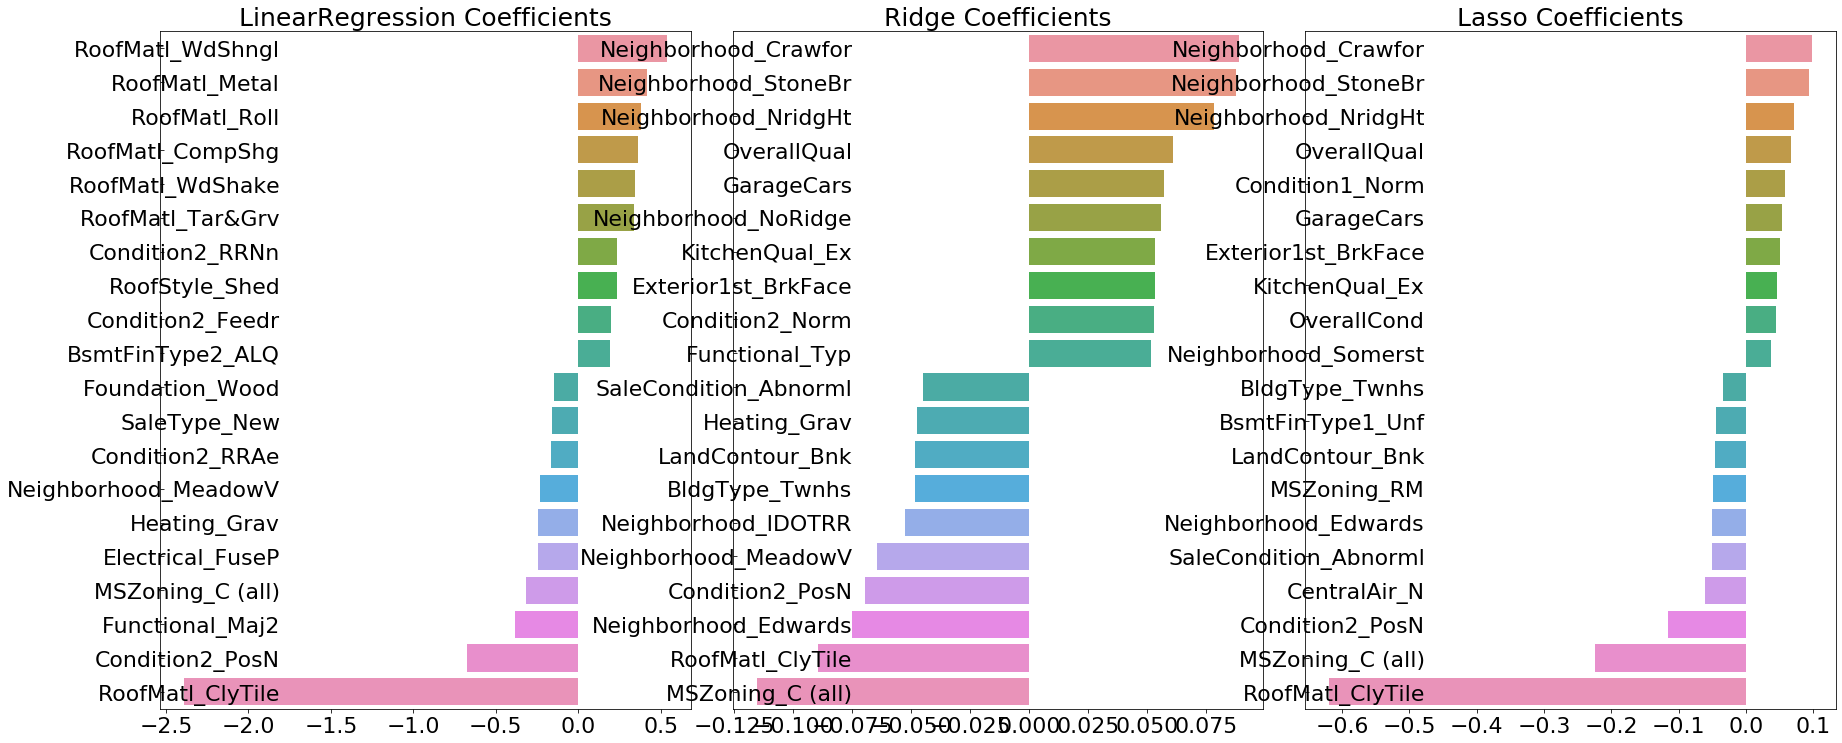

In [44]:
visualize_coeffieint(models)

alpha 값 최적화 이후, 예측 성능이 더 좋아졌음을 볼 수 있고, Lasso 모델 역시 다른 모델들과 비슷한 피처의 회귀계수가 높음을 볼 수 있다.

#### 피처의 왜곡된 정도 확인

In [48]:
from scipy.stats import skew

features_index=house_df.dtypes[house_df.dtypes!='object'].index # 타입이 object가 아닌 column 명 추출

skew_features=house_df[features_index].apply(lambda x:skew(x))

skew_features_top=skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


추출된 왜곡 정도가 높은 피처를 로그 변환 취함

In [49]:
house_df[skew_features_top.index]=np.log1p(house_df[skew_features_top.index])

In [51]:
house_df[skew_features_top.index].apply(lambda x:skew(x)).sort_values(ascending=False)

PoolArea         14.348342
3SsnPorch         7.727026
LowQualFinSF      7.452650
MiscVal           5.165390
BsmtHalfBath      3.929022
KitchenAbvGr      3.865437
ScreenPorch       3.147171
BsmtFinSF2        2.521100
EnclosedPorch     2.110104
MasVnrArea        0.480626
MSSubClass        0.248741
WoodDeckSF        0.153379
1stFlrSF          0.080032
GrLivArea        -0.006134
OpenPorchSF      -0.023373
LotArea          -0.137263
BsmtFinSF1       -0.617774
LotFrontage      -0.891060
TotalBsmtSF      -5.149373
dtype: float64

여전히 높은 왜곡을 보이는 피처들이 있지만, 더 이상 로그 변환을 하더라도 개선하기가 어렵다.

In [52]:
# 원핫인코딩

house_df_ohe=pd.get_dummies(house_df)

y=house_df_ohe['SalePrice']
X=house_df_ohe.drop('SalePrice', axis=1)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

In [54]:
ridge_params={'alpha' : [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params={'alpha' : [0.001, 0.005, 0.008, 0.05 ,0.03, 0.1, 0.5, 1, 5, 10]}

ridge_reg=Ridge()
lasso_reg=Lasso()

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV시 최적 평균 RMSE 값 : 0.1275 , 최적 alpha : {'alpha': 10}
Lasso 5 CV시 최적 평균 RMSE 값 : 0.1252 , 최적 alpha : {'alpha': 0.001}


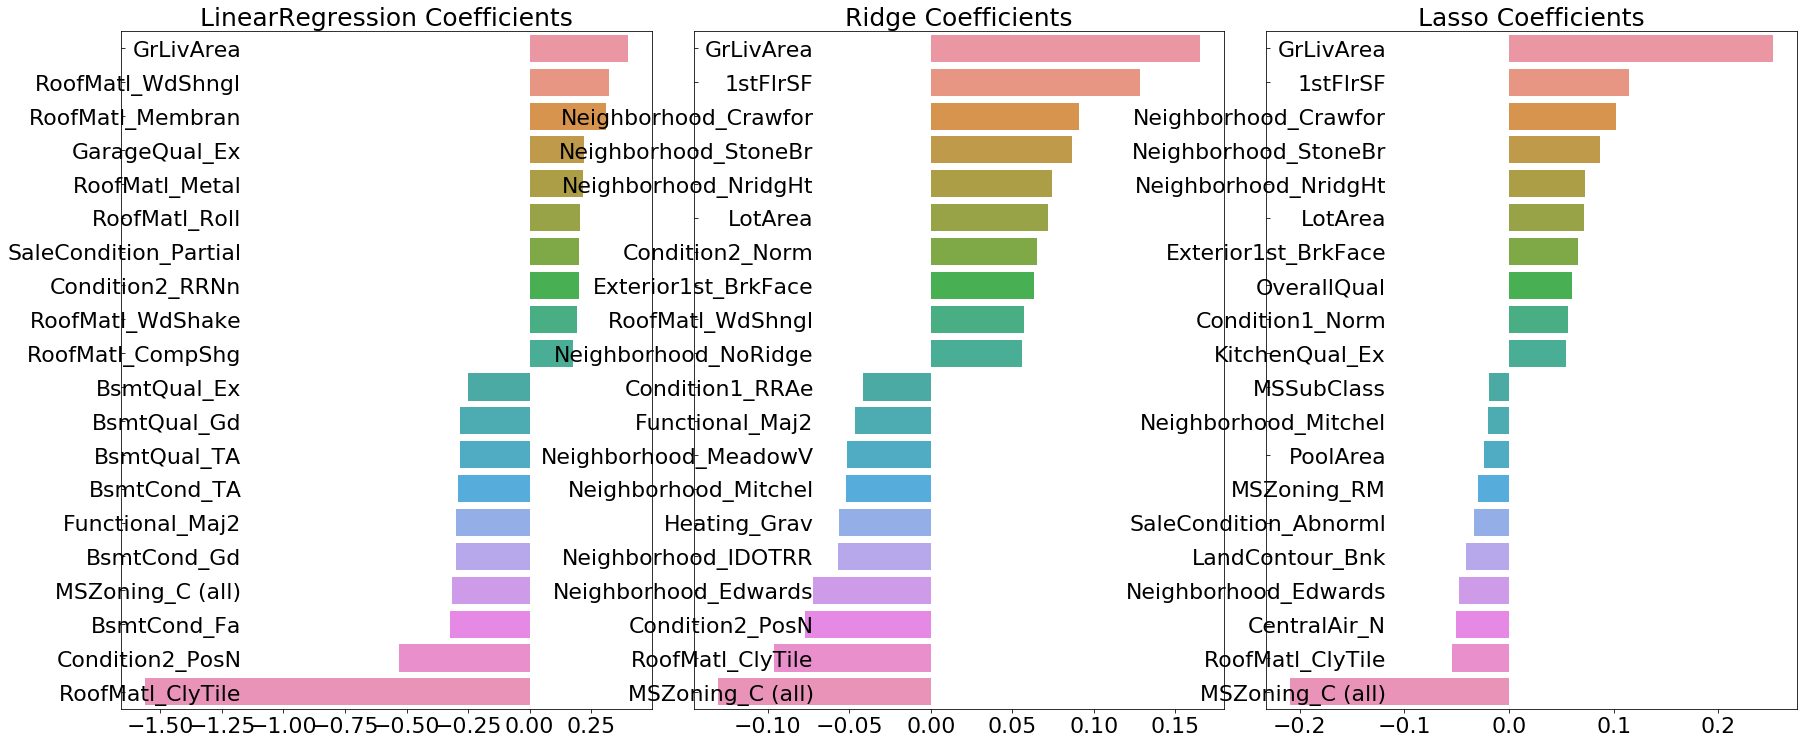

In [57]:
lr_reg=LinearRegression()
ridge_reg=Ridge(alpha=10)
lasso_reg=Lasso(alpha=0.001)

lr_reg.fit(x_train, y_train)
ridge_reg.fit(x_train, y_train)
lasso_reg.fit(x_train, y_train)

models=[lr_reg, ridge_reg, lasso_reg]
visualize_coeffieint(models)

주거공간이 가격을 결정하는데 제일 큰 상관이 있음을 볼 수 있다.

#### 이상치 처리

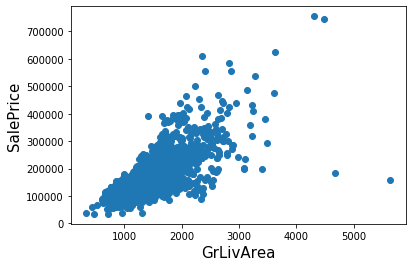

In [59]:
plt.scatter(x=house_df_origin['GrLivArea'], y=house_df_origin['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [60]:
cond1=house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2=house_df_ohe['SalePrice'] < np.log1p(500000)

outlier_index=house_df_ohe[cond1 & cond2].index

In [62]:
print('이상치 레코드 index : ',outlier_index.values)
print('이상치 삭제 전 house_df_ohe shape : ',house_df_ohe.shape)

house_df_ohe.drop(outlier_index, axis=0, inplace=True)
print('이상치 삭제 후 house_df_ohe shape : ',house_df_ohe.shape)

이상치 레코드 index :  [ 523 1298]
이상치 삭제 전 house_df_ohe shape :  (1460, 271)
이상치 삭제 후 house_df_ohe shape :  (1458, 271)


In [63]:
y=house_df_ohe['SalePrice']
X=house_df_ohe.drop('SalePrice', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

In [64]:
ridge_params={'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params={'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

ridge_reg=Ridge()
lasso_reg=Lasso()

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 CV시 최적 평균 RMSE 값 : 0.1125 , 최적 alpha : {'alpha': 8}
Lasso 5 CV시 최적 평균 RMSE 값 : 0.1122 , 최적 alpha : {'alpha': 0.001}


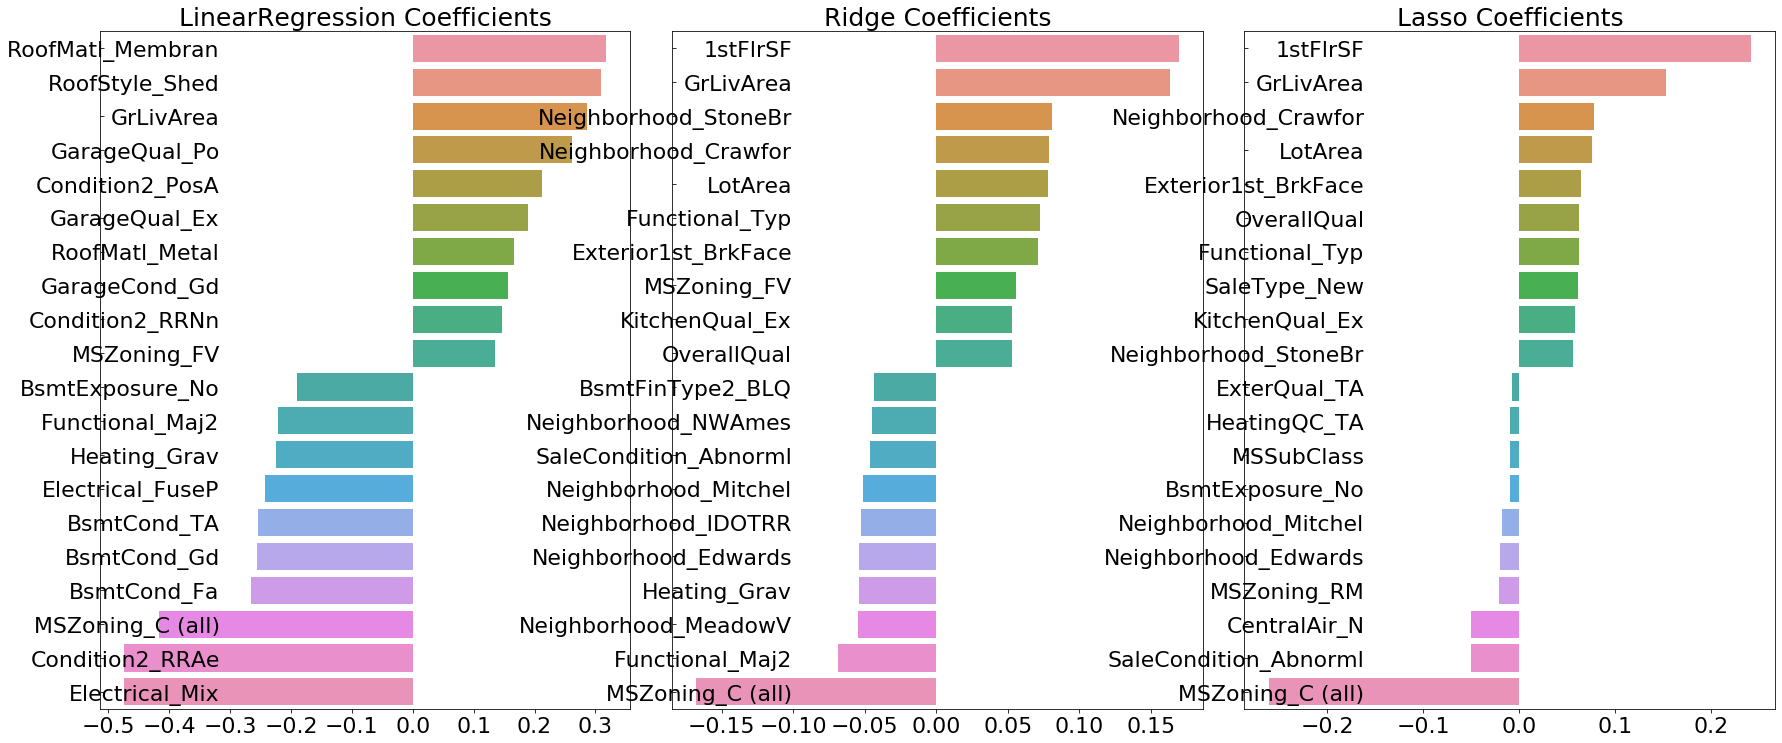

In [65]:
lr_reg=LinearRegression()
ridge_reg=Ridge(alpha=8)
lasso_reg=Lasso(alpha=0.001)

lr_reg.fit(x_train, y_train)
ridge_reg.fit(x_train, y_train)
lasso_reg.fit(x_train, y_train)

models=[lr_reg, ridge_reg, lasso_reg]
visualize_coeffieint(models)

In [66]:
from xgboost import XGBRegressor

xgb_params={'n_estimators':[1000]}
xgb_reg=XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)

print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV시 최적 평균 RMSE 값 : 0.1178 , 최적 alpha : {'n_estimators': 1000}


In [67]:
from lightgbm import LGBMRegressor

lgbm_params={'n_estimators':[1000]}
lgbm_reg=LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV시 최적 평균 RMSE 값 : 0.1163 , 최적 alpha : {'n_estimators': 1000}


In [71]:
xgb_reg.fit(x_train, y_train)
lgbm_reg.fit(x_train, y_train)

xgb_feature_importance=pd.Series(xgb_reg.feature_importances_, index=X.columns)
lgbm_feature_importance=pd.Series(lgbm_reg.feature_importances_, index=X.columns)

In [72]:
xgb_feature_importance=xgb_feature_importance.sort_values(ascending=False)
lgbm_feature_importance=lgbm_feature_importance.sort_values(ascending=False)

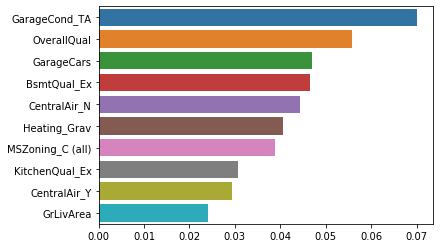

In [74]:
sns.barplot(x=xgb_feature_importance[:10], y=xgb_feature_importance.index[:10])

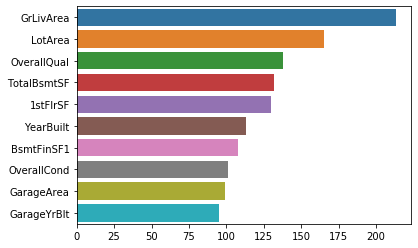

In [75]:
sns.barplot(x=lgbm_feature_importance[:10], y=lgbm_feature_importance.index[:10])

#### 회귀 모델의 예측 결과 혼합을 통한 최종 예측

In [76]:
from sklearn.metrics import mean_squared_error

def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value=preds[key]
        mse=mean_squared_error(y_test, pred_value)
        rmse=np.sqrt(mse)
        
        print('{0} 모델의 RMSE : {1}'.format(key, rmse))
        
ridge_reg=Ridge(alpha=8)
ridge_reg.fit(x_train, y_train)
lasso_reg=Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [79]:
ridge_pred=ridge_reg.predict(x_test)
lasso_pred=lasso_reg.predict(x_test)

pred=0.4*ridge_pred+0.6*lasso_pred

preds={'최종 혼합':pred,
     'Ridge':ridge_pred,
     'Lasso':lasso_pred}

get_rmse_pred(preds)

최종 혼합 모델의 RMSE : 0.10007930884470514
Ridge 모델의 RMSE : 0.10345177546603257
Lasso 모델의 RMSE : 0.10024170460890039


In [80]:
xgb_reg=XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
lgbm_reg=LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

In [81]:
xgb_reg.fit(x_train, y_train)
lgbm_reg.fit(x_train, y_train)

xgb_pred=xgb_reg.predict(x_test)
lgbm_pred=lgbm_reg.predict(x_test)

pred=0.5*xgb_pred+0.5*lgbm_pred

preds={'최종 혼합':pred,
     'XGB':xgb_pred,
     'LGBM':lgbm_pred}

get_rmse_pred(preds)

최종 혼합 모델의 RMSE : 0.10170077353447762
XGB 모델의 RMSE : 0.10738295638346222
LGBM 모델의 RMSE : 0.10382510019327311


#### 스태킹 앙상블 모델을 통한 회귀 예측

In [91]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [92]:
x_train_n=x_train.values
x_test_n=x_test.values
y_train_n=y_train.values

ridge_train, ridge_test=get_stacking_base_datasets(ridge_reg, x_train_n, y_train_n, x_test_n, 5)
lasso_train, lasso_test=get_stacking_base_datasets(lasso_reg, x_train_n, y_train_n, x_test_n, 5)
xgb_train, xgb_test=get_stacking_base_datasets(xgb_reg, x_train_n, y_train_n, x_test_n, 5)
lgbm_train, lgbm_test=get_stacking_base_datasets(lgbm_reg, x_train_n, y_train_n, x_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [93]:
stack_final_x_train=np.c_[ridge_train, lasso_train, xgb_train, lgbm_train]
stack_final_x_test=np.c_[ridge_test, lasso_test, xgb_test, lgbm_test]

meta_model_lasso=Lasso(alpha=0.005)

In [94]:
meta_model_lasso.fit(stack_final_x_train, y_train)

final=meta_model_lasso.predict(stack_final_x_test)

mse=mean_squared_error(y_test, final)
rmse=np.sqrt(mse)

print('스태킹 회귀 모델의 최종 RMSE 값은 : ',rmse)

스태킹 회귀 모델의 최종 RMSE 값은 :  0.09758919438264886
